# The Beta Distribution

Import necessary libraries:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import preliz as pz
from scipy import stats

plt.style.use('ggplot')

## Using Scipy

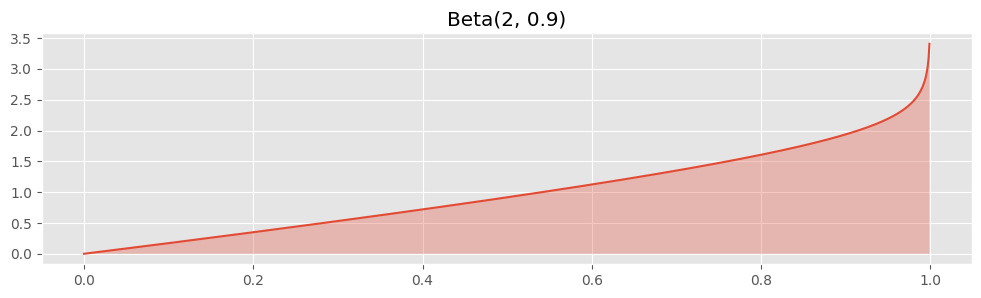

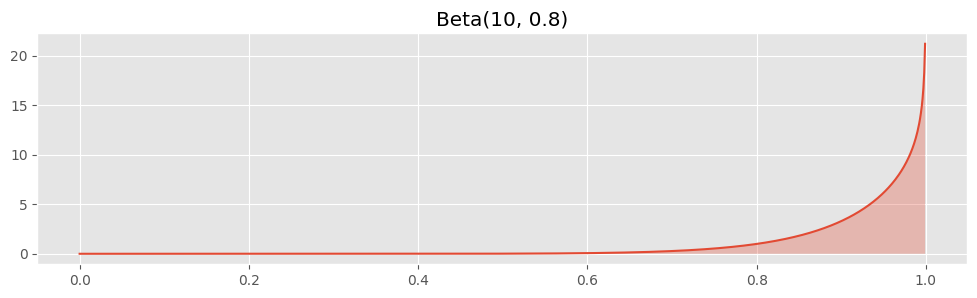

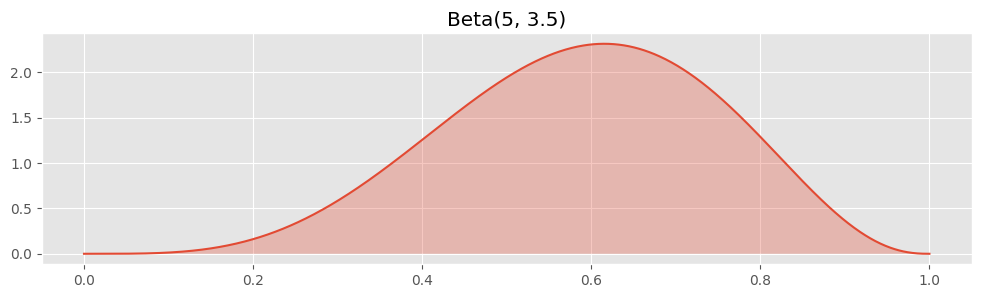

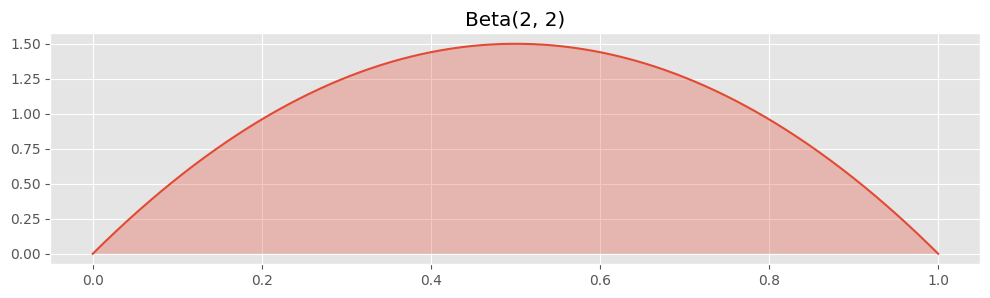

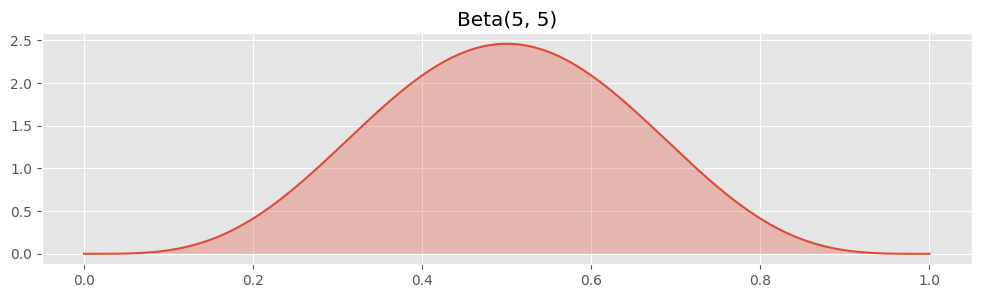

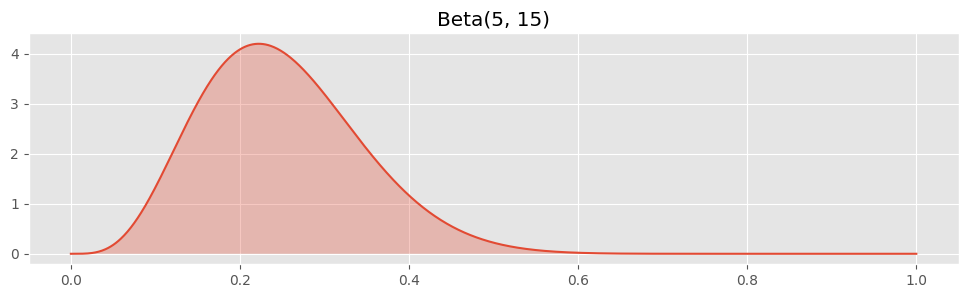

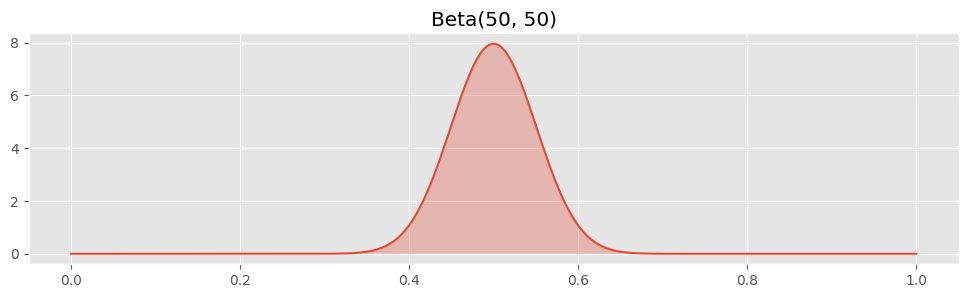

In [13]:
def plot_beta(alpha, beta, figsize=(12, 3)):
    pi_range = np.linspace(0, 1, 1000)
    prob = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]

    plt.figure(figsize=figsize)
    plt.plot(pi_range, prob)
    plt.fill_between(pi_range, prob, alpha=0.3)
    plt.title("Beta({}, {})".format(alpha, beta))


plot_beta(2, 0.9)
plot_beta(10, 0.8)
plot_beta(5, 3.5)
plot_beta(2, 2)
plot_beta(5, 5)
plot_beta(5, 15)
plot_beta(50, 50)

## Array for different values of $\alpha$ and $\beta$

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_44615/2345630293.py:14: SyntaxWarning: invalid escape sequence '\p'
  if j == 0: plt.xlabel("$\pi$")


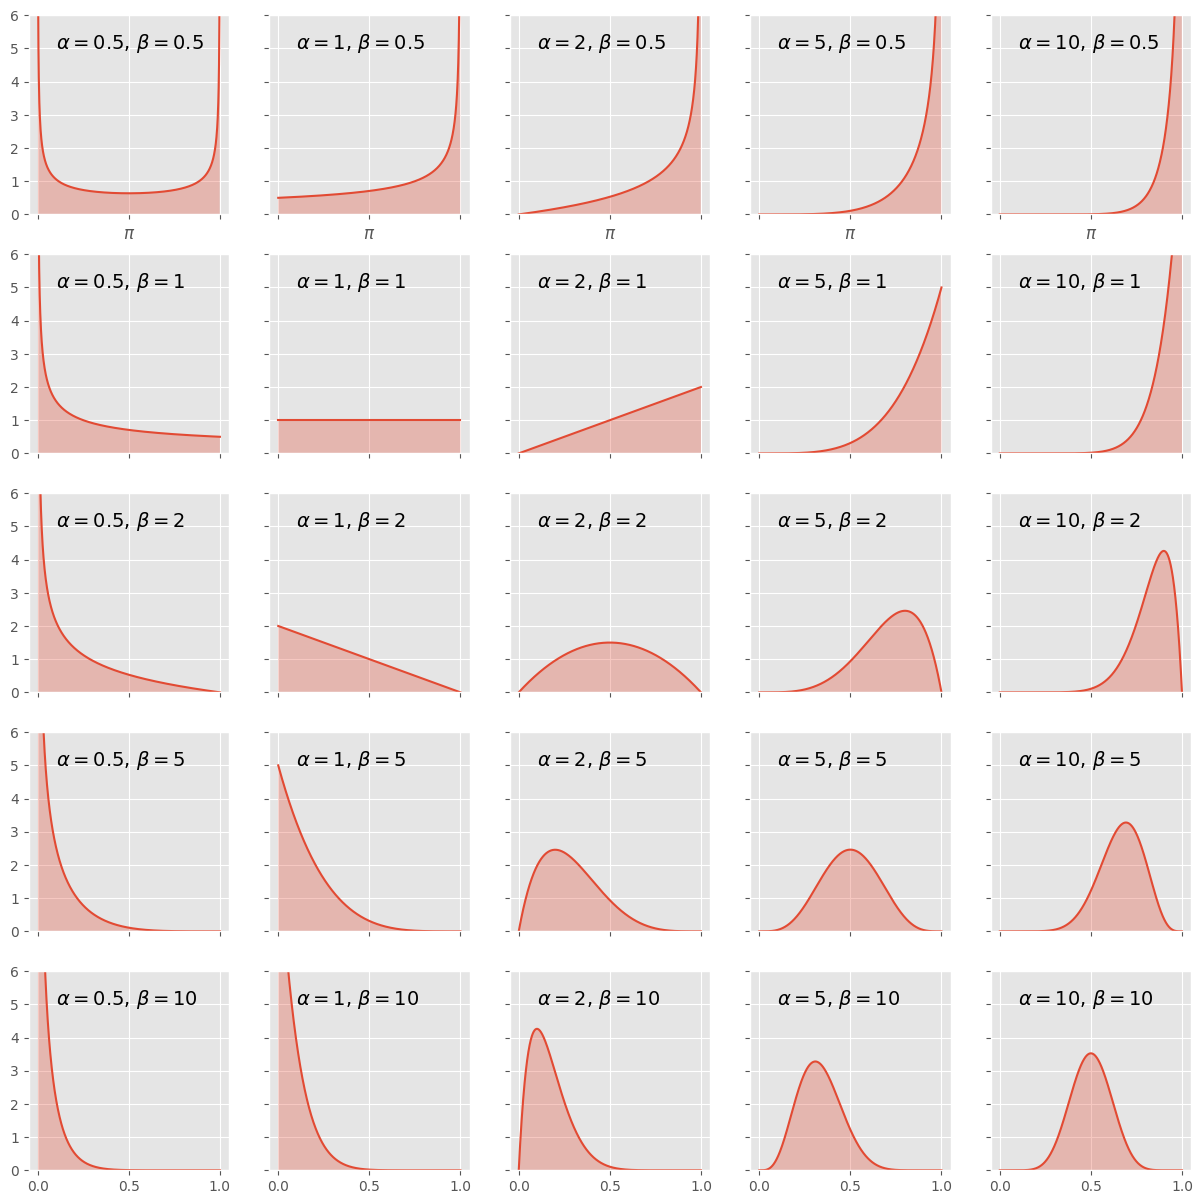

In [14]:
alpha_beta_range = [0.5, 1, 2, 5, 10]
n = len(alpha_beta_range)

fig, ax = plt.subplots(n, n, figsize=(15, 15), sharex=True, sharey=True)
for i in range(n):
    for j in range(n):
        plt.sca(ax[j, i])

        pi_range = np.linspace(0, 1, 1000)
        prob = [stats.beta.pdf(pi, a=alpha_beta_range[i], b=alpha_beta_range[j]) for pi in pi_range]
        plt.plot(pi_range, prob)
        plt.ylim([0, 6])
        plt.fill_between(pi_range, prob, alpha=0.3)
        if j == 0: plt.xlabel("$\pi$")
        #if i==n-1: plt.ylabel("$p(\pi)$")
        plt.text(0.1, 5, "$\\alpha={}$, $\\beta={}$".format(alpha_beta_range[i], alpha_beta_range[j]), fontsize=14)

## Plot using PreliZ

<Axes: >

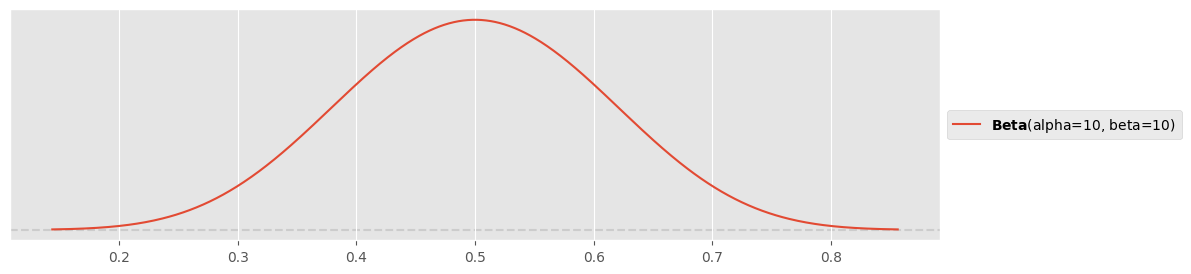

In [15]:
pz.Beta(10, 10).plot_pdf(figsize=(12, 3))

## Interactive plot using PreliZ

$
\displaystyle{E[\pi] = \frac{\alpha}{\alpha+\beta}}
$

$
\displaystyle{\text{Var}[\pi] = \frac{\alpha\beta}{(\alpha+\beta)^2\;(\alpha+\beta+1)}}
$

In [16]:
pz.Beta(10, 10).plot_interactive(figsize=(12, 3))

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

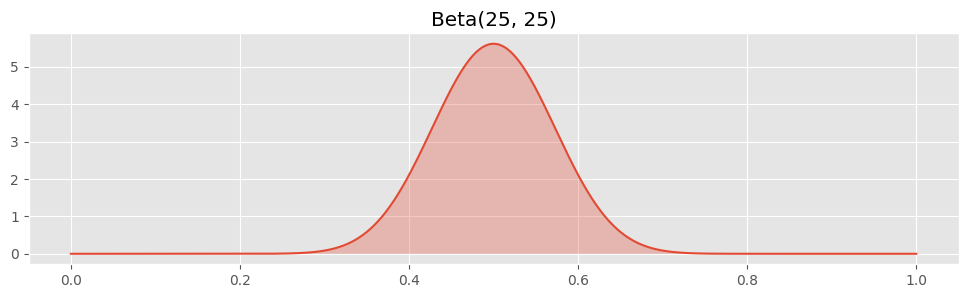

In [17]:
plot_beta(25, 25)

### Exercise 1

a)

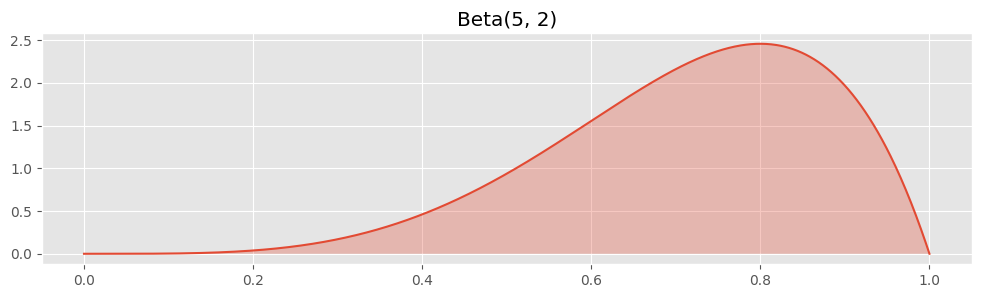

In [18]:
plot_beta(5, 2)

# b)

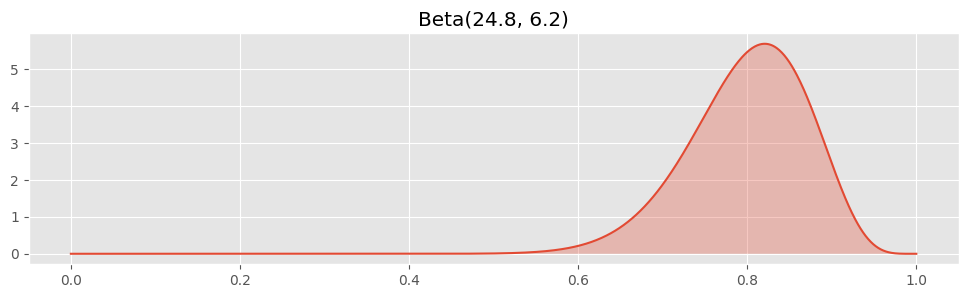

In [19]:
plot_beta(24.8, 6.2)

### Exercise 2

a)

<Axes: >

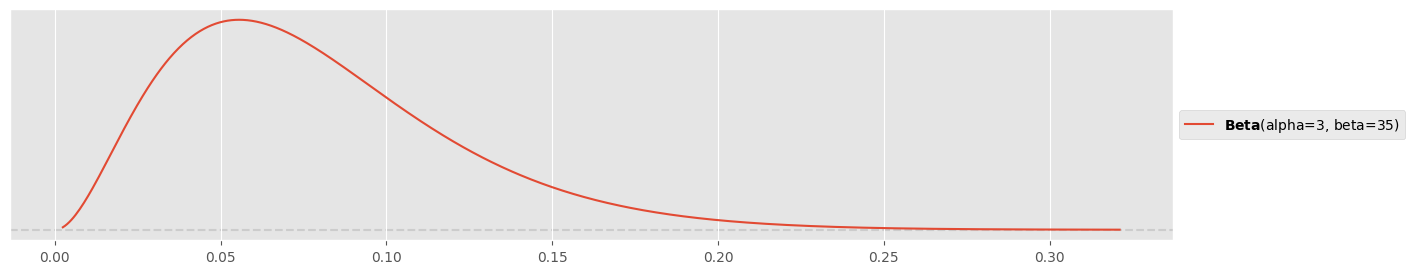

In [23]:
plt.rcParams["figure.figsize"] = (15, 3)

alpha_heidi = 3
beta_heidi = 35
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()

<Axes: >

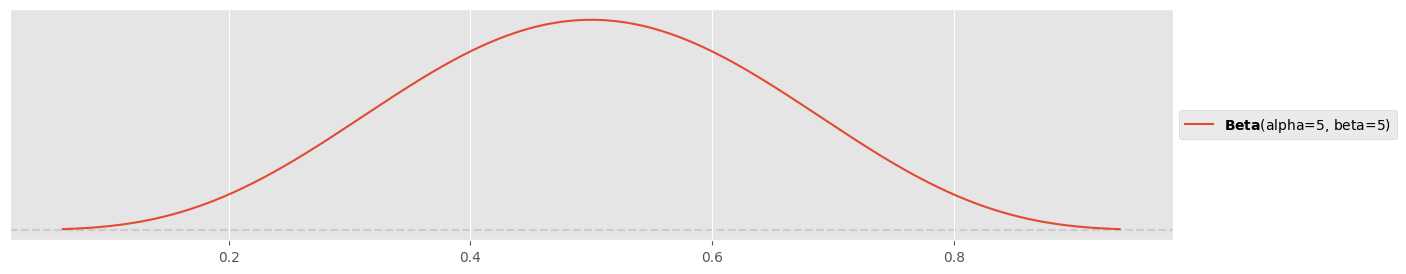

In [25]:
plt.rcParams["figure.figsize"] = (15, 3)

alpha_Peter = 5
beta_Peter = 5
pz.Beta(alpha=alpha_Peter, beta=beta_Peter).plot_pdf()

### b)
Posterior distribution -> Beta( $\alpha_{\text{prior}} + \text{number of successes}$, $\beta_{\text{prior}} + \text{number of failures}$)

\$ \text{number of failures} = n -k \$

<Axes: >

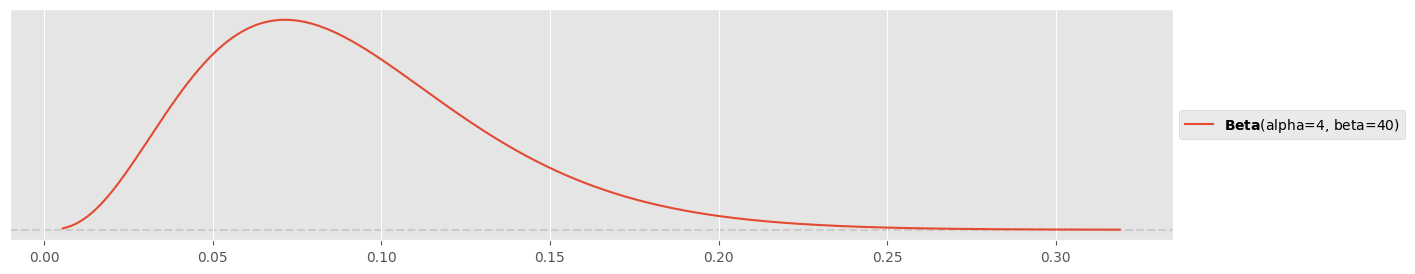

In [29]:
# Heidi Posterior
pz.Beta(alpha=alpha_heidi + 1, beta=beta_heidi + 5).plot_pdf()

<Axes: >

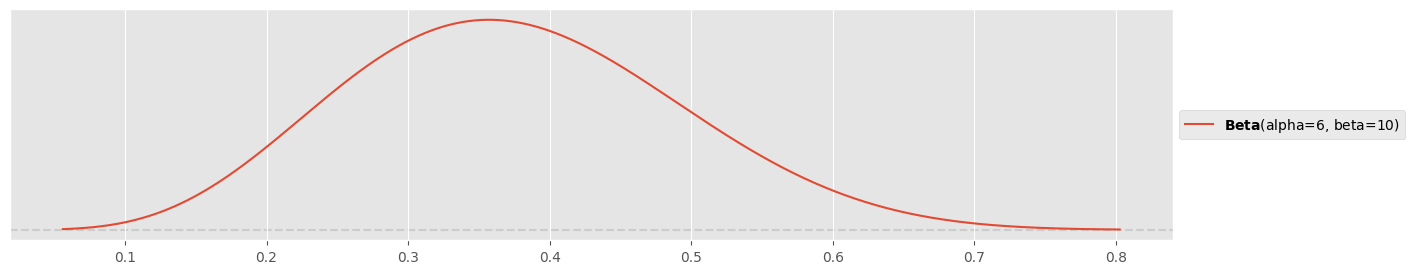

In [30]:
# Peter Posterior
pz.Beta(alpha=alpha_Peter + 1, beta=beta_Peter + 5).plot_pdf()

### c)


<Axes: >

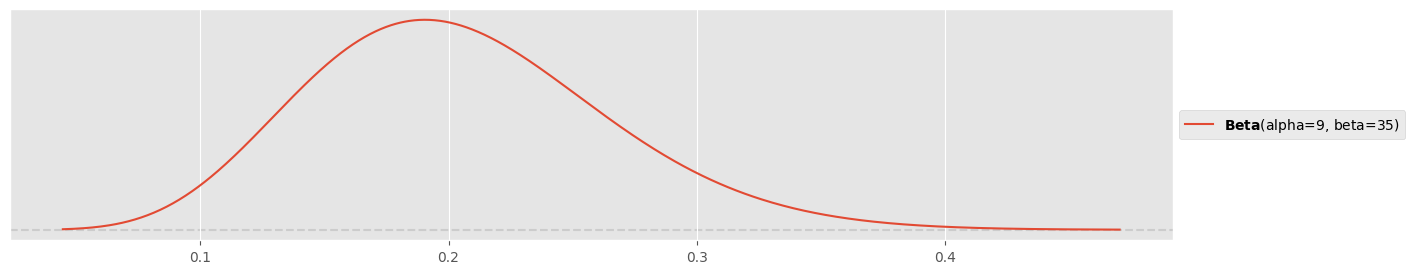

In [32]:
pz.Beta(alpha=alpha_heidi + 6, beta=beta_heidi).plot_pdf()

<Axes: >

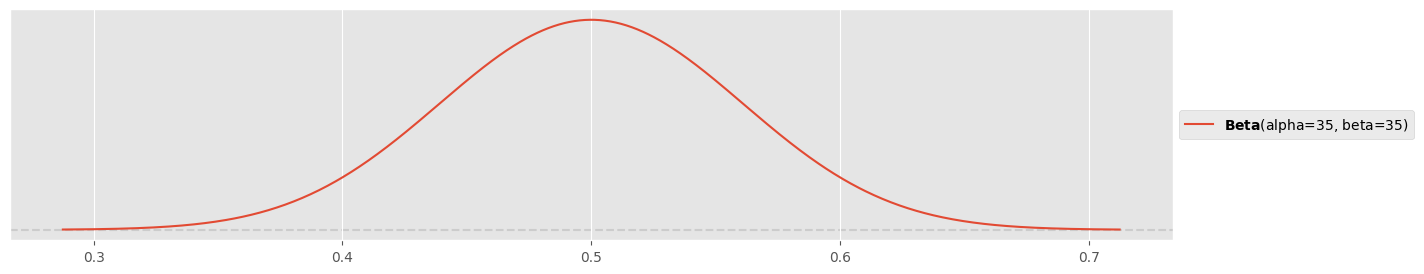

In [41]:
pz.Beta(alpha=alpha_heidi + 32, beta=beta_heidi).plot_pdf()
# To increase heidis belief, we need to increase the number of successes to 32

### Exercise 4

b)

In [57]:
p_head = 0.7
n_1 = 10
n_2 = 30
n_3 = 100

k_1 = np.sum(np.random.binomial(n_1, p_head))
print(f"Expected mean estimate for {n_1} flips: {k_1 / n_1 * 100}")
k_2 = np.sum(np.random.binomial(n_2, p_head))
print(f"Expected mean estimate for {n_2} flips: {k_2 / n_2 * 100}")
k_3 = np.sum(np.random.binomial(n_3, p_head))
print(f"Expected mean estimate for {n_3} flips: {k_3 / n_3 * 100}")

Expected mean estimate for 10 flips: 80.0
Expected mean estimate for 30 flips: 73.33333333333333
Expected mean estimate for 100 flips: 69.0


c)


<Axes: >

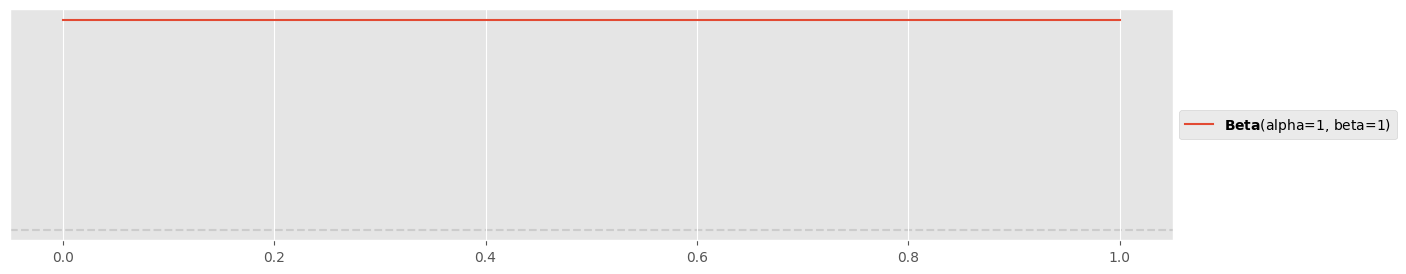

In [59]:
pz.Beta(alpha=1, beta=1).plot_pdf()

<Axes: >

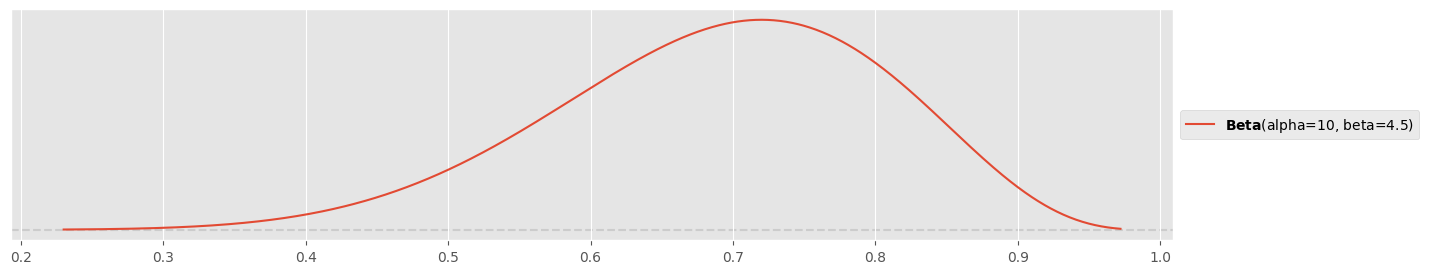

In [60]:
pz.Beta(alpha=10, beta=4.5).plot_pdf()

<Axes: >

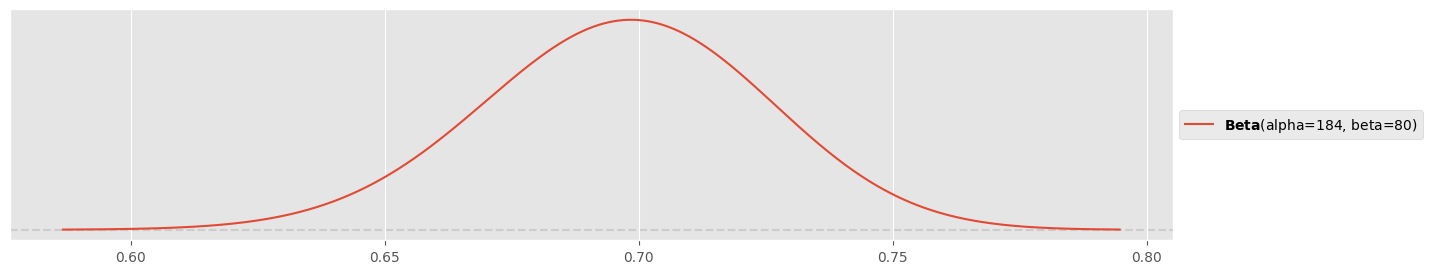

In [61]:
pz.Beta(alpha=184, beta=80).plot_pdf()

<Axes: >

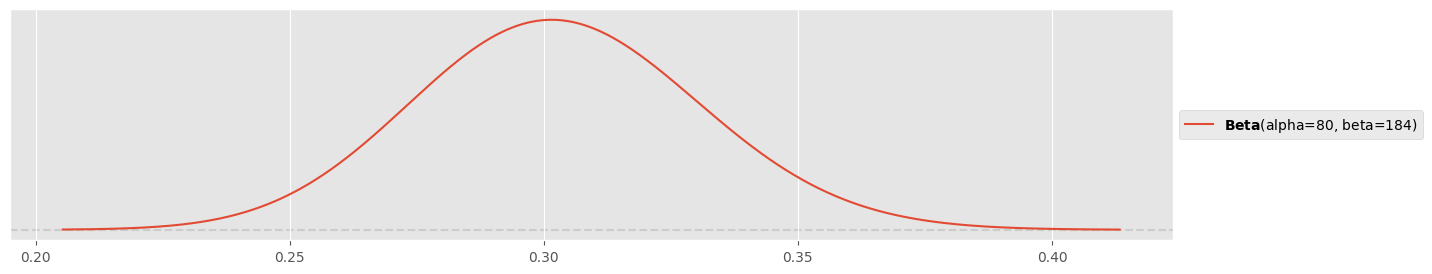

In [62]:
pz.Beta(alpha=80, beta=184).plot_pdf()

In [63]:
from scipy import stats


def plot_beta_binomial(alpha, beta, n, k, figsize=(13, 3)):
    # create figure
    plt.figure(figsize=figsize)

    # numeric evaluation range for pi
    pi_range = np.linspace(0, 1, 1000)

    # prior
    prior = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]
    plt.plot(pi_range, prior, alpha=0.5, label="prior", c="orange")
    plt.fill_between(pi_range, prior, alpha=0.3, color="orange")

    # scaled likelihood
    likelihood = [stats.binom.pmf(n=n, k=k, p=pi) for pi in pi_range]
    likelihood /= np.sum(likelihood) * (pi_range[1] - pi_range[0])
    plt.plot(pi_range, likelihood, alpha=0.5, label="(scaled) likelihood", c="blue")
    plt.fill_between(pi_range, likelihood, alpha=0.3, color="blue")

    # posterior
    posterior = [stats.beta.pdf(pi, a=alpha + k, b=beta + n - k) for pi in pi_range]
    plt.plot(pi_range, posterior, alpha=0.5, label="posterior", color="darkgreen")
    plt.fill_between(pi_range, posterior, alpha=0.3, color="darkgreen")

    # enable legend and set descriptive title
    plt.legend(fontsize=14)
    plt.title("$\\alpha = {}, \; \\beta={}, \; n={}, \; k={}$".format(alpha, beta, n, k))

<>:28: SyntaxWarning: invalid escape sequence '\;'
<>:28: SyntaxWarning: invalid escape sequence '\;'
/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_44615/3063556310.py:28: SyntaxWarning: invalid escape sequence '\;'
  plt.title( "$\\alpha = {}, \; \\beta={}, \; n={}, \; k={}$".format(alpha, beta, n, k) )


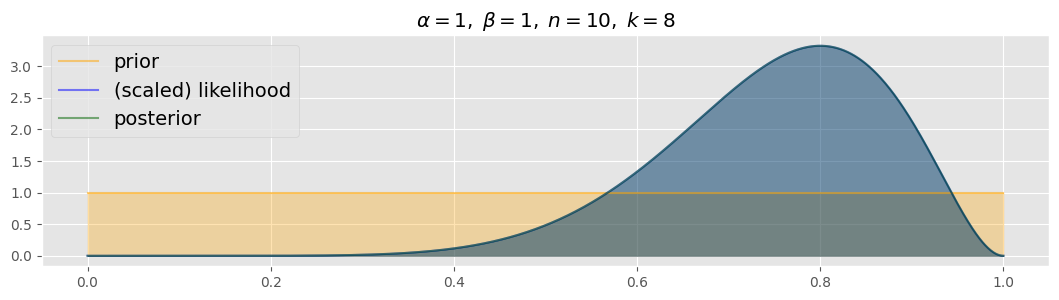

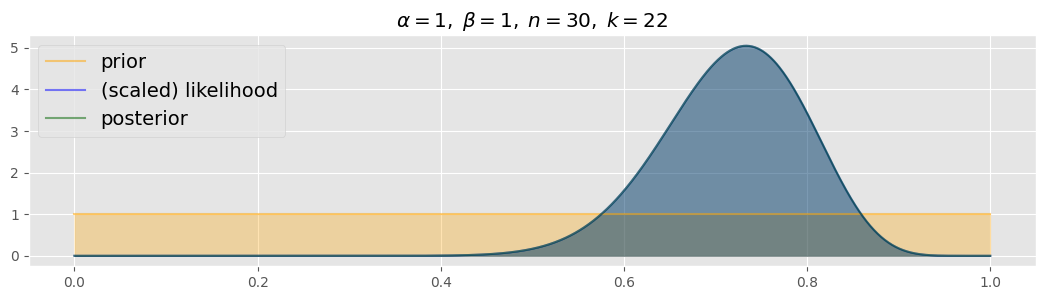

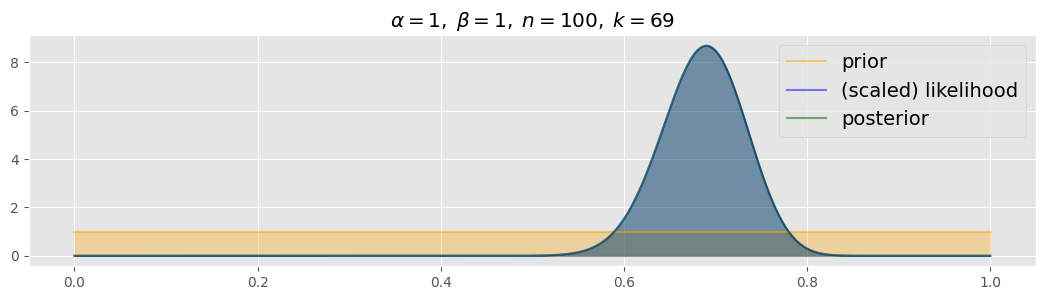

In [64]:
# for prio Beta(1, 1)  
plot_beta_binomial(1, 1, n_1, k_1)
plot_beta_binomial(1, 1, n_2, k_2)
plot_beta_binomial(1, 1, n_3, k_3)

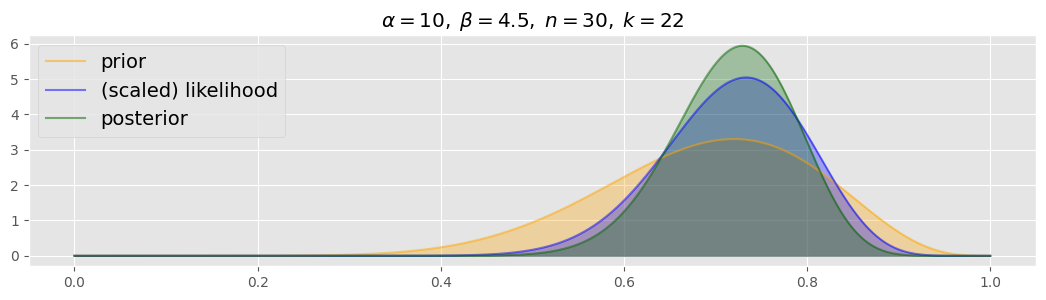

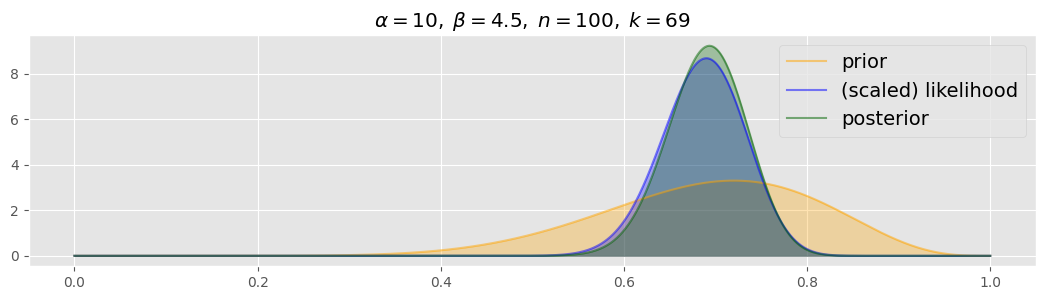

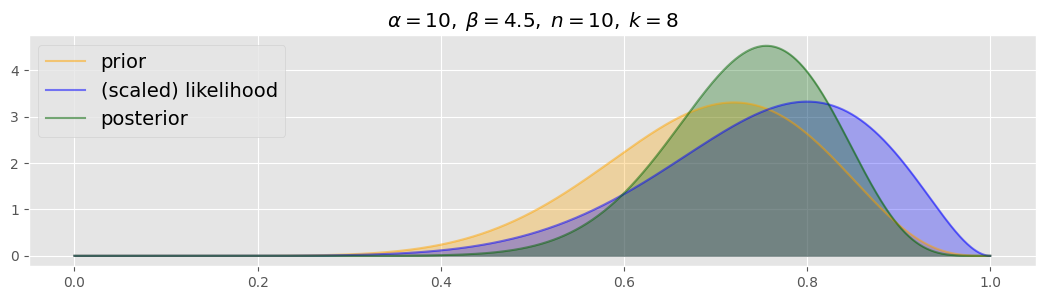

In [65]:
# for prio Beta(10, 4.5)
plot_beta_binomial(10, 4.5, n_2, k_2)
plot_beta_binomial(10, 4.5, n_3, k_3)
plot_beta_binomial(10, 4.5, n_1, k_1)

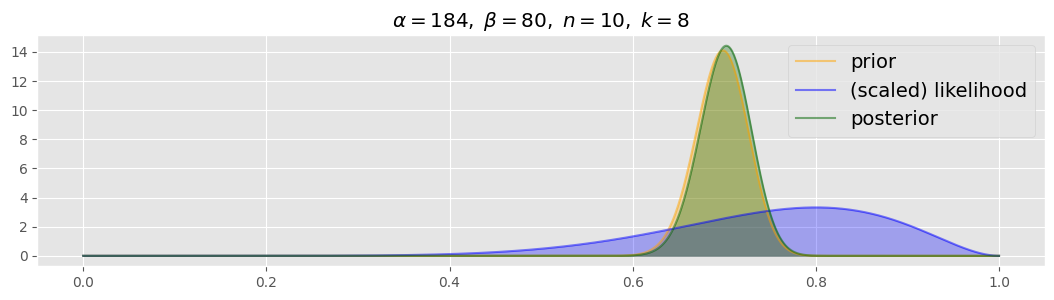

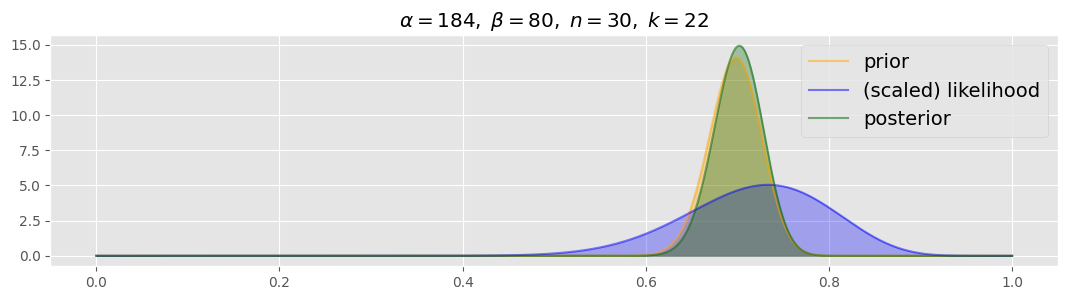

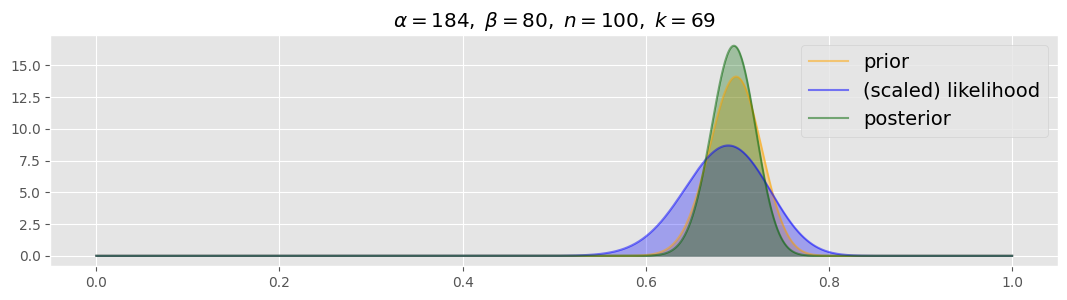

In [66]:
# for prio Beta(184, 80)
plot_beta_binomial(184, 80, n_1, k_1)
plot_beta_binomial(184, 80, n_2, k_2)
plot_beta_binomial(184, 80, n_3, k_3)

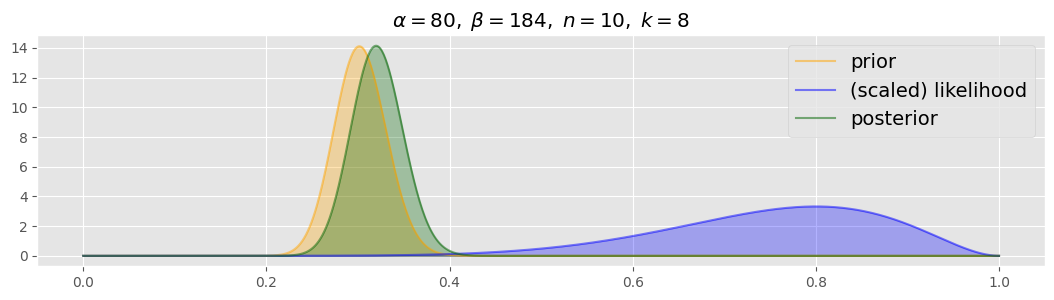

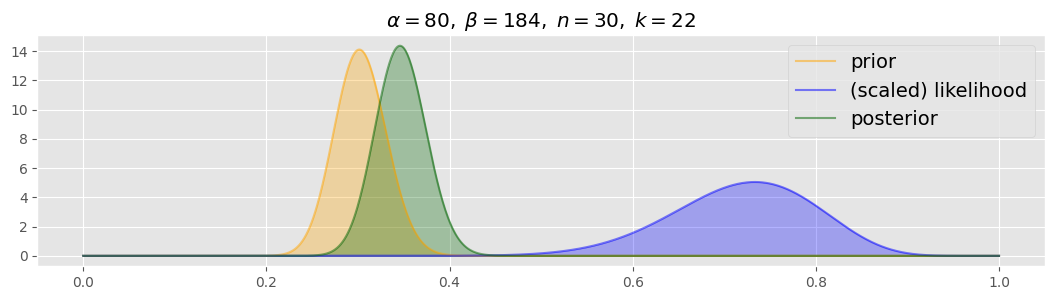

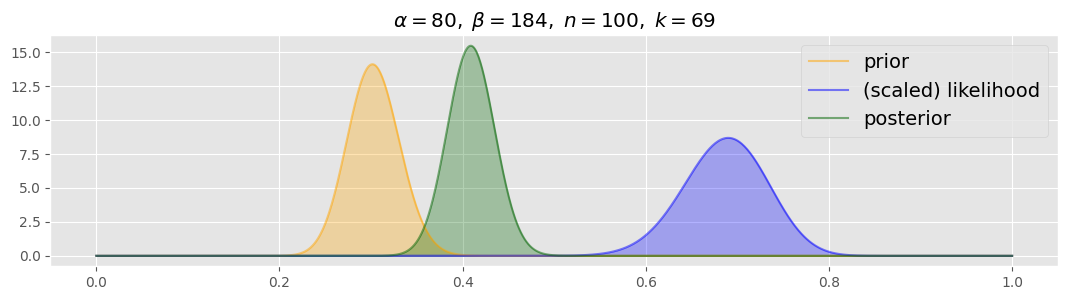

In [67]:
# for prio Beta(80, 184)
plot_beta_binomial(80, 184, n_1, k_1)
plot_beta_binomial(80, 184, n_2, k_2)
plot_beta_binomial(80, 184, n_3, k_3)

### Exercise 5

a)

(-0.5, 8.0)

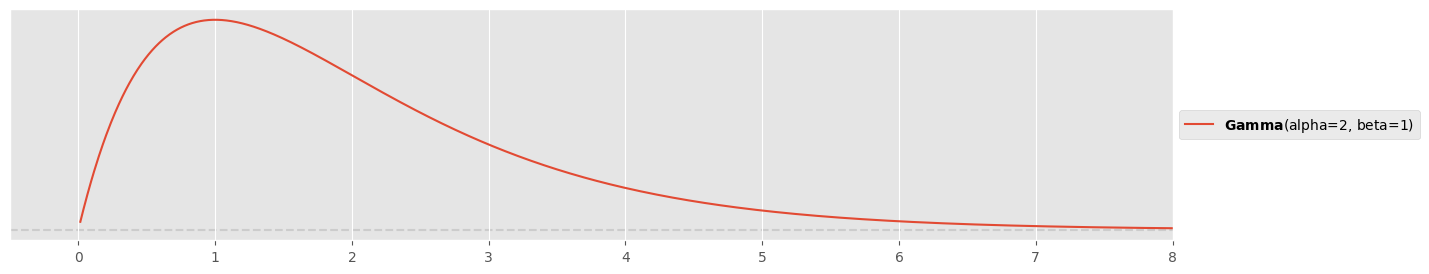

In [75]:
s = 2
r = 1
pz.Gamma(s, r).plot_pdf()
plt.xlim(-0.5, 8)

b)

(-0.5, 8.0)

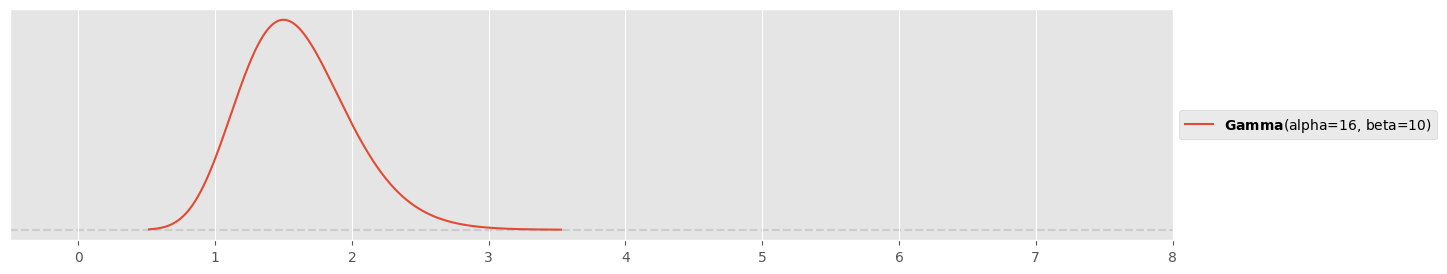

In [82]:
# Gamma update rule
y = [0, 2, 5, 2, 1, 0, 1, 1, 2]
n = len(y)

pz.Gamma(s + sum(y), r + n).plot_pdf()
plt.xlim(-0.5, 8)

Text(0.5, 1.0, 'blue: prior, orange: posterior')

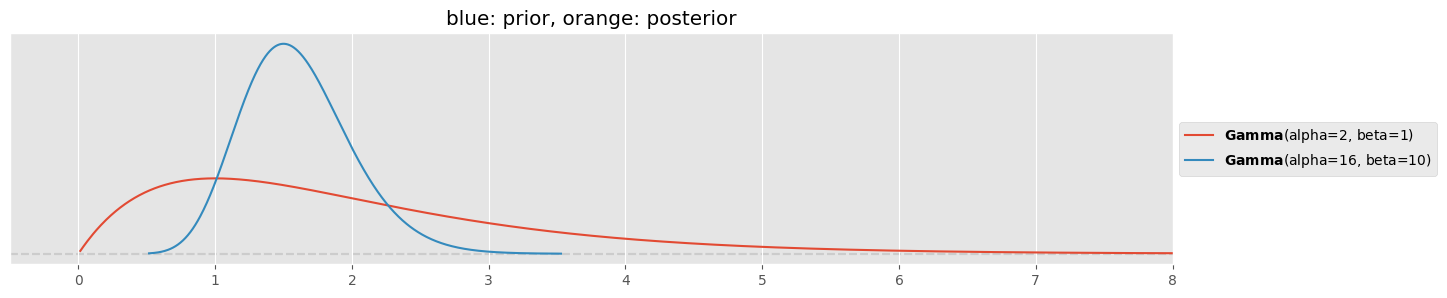

In [84]:
pz.Gamma(s, r).plot_pdf()
pz.Gamma(s + sum(y), r + len(y)).plot_pdf()
plt.xlim(-0.5, 8)
plt.title("blue: prior, orange: posterior")

In [87]:
pz.Gamma(s + sum(y), r + len(y)).summary()

Gamma(mean=1.6, median=1.57, std=0.4, lower=0.88, upper=2.36)

c)

In [88]:
N = 10000
lmbd_vals = pz.Gamma(s, r).rvs(N)
lmbd_vals.shape

(10000,)

In [89]:
samples = [sorted(list(pz.Poisson(mu=lmbd).rvs(9))) for lmbd in lmbd_vals]
samples[:10]

[[0, 0, 0, 1, 2, 3, 4, 4, 5],
 [0, 0, 0, 0, 0, 1, 1, 1, 2],
 [0, 0, 0, 1, 1, 1, 1, 3, 5],
 [0, 0, 1, 1, 3, 3, 3, 4, 5],
 [0, 0, 0, 0, 0, 1, 1, 1, 2],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 2, 3],
 [0, 2, 2, 2, 2, 2, 2, 3, 6],
 [0, 1, 1, 1, 1, 1, 2, 2, 3],
 [0, 0, 0, 0, 1, 1, 1, 2, 4]]

In [90]:
match = [s == sorted(list(y)) for s in samples]
lmbd_vals[match]

array([1.53685874, 1.47609116, 1.54697565, 0.88596581, 0.91898461])

In [91]:
np.mean( lmbd_vals[match] ), np.std( lmbd_vals[match] )

(1.2729751954204147, 0.30366180919538216)

### Exercise 6

a)
